In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# the supplied CSV data files are in the data/raw directory
#load data
df = pd.read_csv('../data/raw/data3.csv')

# drop unnecessary columns
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,project_id,active,language,text,theme
0,22244,False,en,save life street dog afghanistanmore street do...,Animal Welfare
1,30154,False,en,save street dog death afghanistanmore dog thou...,Animal Welfare
2,33084,False,en,save canine human live afghanistanrabies deadl...,Animal Welfare
3,35906,False,en,green tanzaniagreen tanzania project design he...,Animal Welfare
4,41112,False,en,help nowzad reduce rabies afghanistanrabies po...,Animal Welfare


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37911 entries, 0 to 37910
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   project_id  37911 non-null  int64 
 1   active      37911 non-null  bool  
 2   language    37911 non-null  object
 3   text        37911 non-null  object
 4   theme       37911 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 1.2+ MB


In [25]:
df.value_counts('theme')

theme
Education                   11189
Physical Health              5464
Gender Equality              4334
Economic Growth              3083
Child Protection             2319
Disaster Response            2141
Climate Action               1795
Food Security                1227
Justice and Human Rights     1130
COVID-19                      977
Animal Welfare                790
Wildlife Conservation         588
Arts and Culture              553
Sport                         419
Digital Literacy              412
Clean Water                   256
Peace and Reconciliation      251
Disability Rights             187
Safe Housing                  150
Mental Health                 112
LGBTQIA+ Equality             102
Refugee Rights                100
Reproductive Health            79
Ecosystem Restoration          70
Sustainable Agriculture        57
Ending Abuse                   47
Ending Human Trafficking       37
Racial Justice                 13
dtype: int64

In [5]:
df = df[df['language'] == 'en']
df_subsample = df.sample(10000,random_state=123)
X = df_subsample['text']
y = df_subsample['theme']

In [27]:
y.value_counts()

Education                   2925
Physical Health             1455
Gender Equality             1210
Economic Growth              791
Child Protection             582
Disaster Response            557
Climate Action               448
Food Security                348
Justice and Human Rights     289
COVID-19                     254
Animal Welfare               187
Arts and Culture             160
Wildlife Conservation        150
Sport                        113
Digital Literacy             111
Clean Water                   84
Peace and Reconciliation      74
Disability Rights             55
Safe Housing                  38
Mental Health                 35
LGBTQIA+ Equality             27
Refugee Rights                26
Reproductive Health           25
Ecosystem Restoration         21
Sustainable Agriculture       16
Ending Human Trafficking       9
Ending Abuse                   8
Racial Justice                 2
Name: theme, dtype: int64

In [6]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(X)
bw = pd.DataFrame(counts.toarray(),columns=count_vect.get_feature_names())

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
bw

,aa,aaate,aacdp,aadhiyan,aadhya,aads,aae,aai,aaina,aais,...,zurich,zyi,zyuzinsky,zywiec,ın,ıneeds,ınterest,ınterested,ınvolved,œlight
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(X)
tfid = pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names())
tfid

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaate,aacdp,aadhiyan,aadhya,aads,aae,aai,aaina,aais,...,zurich,zyi,zyuzinsky,zywiec,ın,ıneeds,ınterest,ınterested,ınvolved,œlight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
bw['theme'] = list(y_train)
tfid['theme'] = list(y_train)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(tfid, y, train_size=0.7, random_state=47)

In [13]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predicted_NB = NB.predict(X_test)
print(classification_report(y_test, predicted_NB))

                          precision    recall  f1-score   support

          Animal Welfare       0.96      0.42      0.58        53
        Arts and Culture       0.20      0.02      0.04        41
                COVID-19       0.54      0.09      0.16        75
        Child Protection       0.31      0.16      0.21       172
             Clean Water       1.00      0.15      0.26        20
          Climate Action       0.51      0.31      0.38       137
        Digital Literacy       1.00      0.07      0.13        44
       Disability Rights       0.33      0.06      0.10        17
       Disaster Response       0.70      0.42      0.52       172
         Economic Growth       0.46      0.31      0.37       231
   Ecosystem Restoration       0.00      0.00      0.00         4
               Education       0.43      0.71      0.54       912
            Ending Abuse       0.00      0.00      0.00         2
Ending Human Trafficking       0.00      0.00      0.00         2
         

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
NB.classes_

array(['Animal Welfare', 'Arts and Culture', 'COVID-19',
       'Child Protection', 'Clean Water', 'Climate Action',
       'Digital Literacy', 'Disability Rights', 'Disaster Response',
       'Economic Growth', 'Ecosystem Restoration', 'Education',
       'Ending Abuse', 'Ending Human Trafficking', 'Food Security',
       'Gender Equality', 'Justice and Human Rights', 'LGBTQIA+ Equality',
       'Mental Health', 'Peace and Reconciliation', 'Physical Health',
       'Racial Justice', 'Refugee Rights', 'Reproductive Health',
       'Safe Housing', 'Sport', 'Sustainable Agriculture',
       'Wildlife Conservation'], dtype='<U24')

In [15]:
print(confusion_matrix(y_test, predicted_NB))

[[ 22   0   0   2   0   1   0   0   3   1   0  14   0   0   1   1   0   0
    0   0   5   0   0   0   0   0   0   3]
 [  0   1   0   0   0   1   0   0   1   0   0  25   0   0   0   4   0   0
    0   0   9   0   0   0   0   0   0   0]
 [  0   0   7   2   0   0   0   0   2   0   0  30   0   0   0   5   1   0
    0   0  28   0   0   0   0   0   0   0]
 [  0   0   0  27   0   1   0   0   3   4   0  97   0   0   1  20   1   0
    0   0  17   0   0   0   0   0   0   1]
 [  0   0   0   1   3   0   0   0   0   0   0  10   0   0   0   1   0   0
    0   0   5   0   0   0   0   0   0   0]
 [  0   0   0   1   0  42   0   1   1  10   0  59   0   0   1   8   0   0
    0   0  13   0   0   0   0   1   0   0]
 [  0   1   0   0   0   3   3   0   1   2   0  31   0   0   0   1   0   0
    0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   1   0   0   0   7   0   0   0   3   0   0
    0   0   4   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0   0  72   0   0  62   0   0   1  1

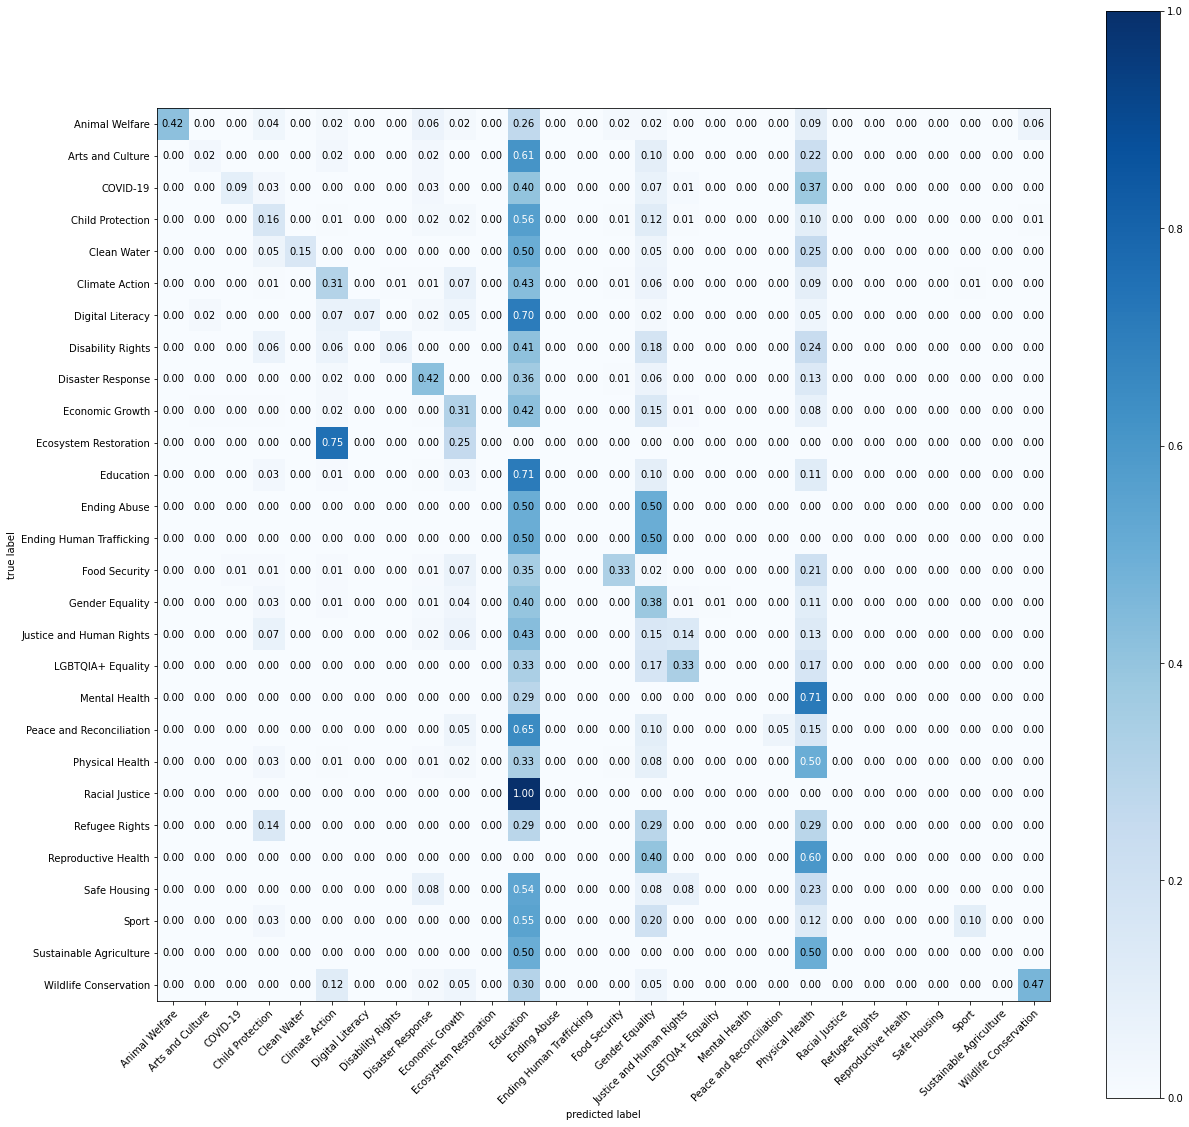

In [24]:
multiclass = confusion_matrix(y_test, predicted_NB)

class_names = NB.classes_

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize = (20,20))
plt.show()

In [19]:
class_names

['aa',
 'aaate',
 'aacdp',
 'aadhiyan',
 'aadhya',
 'aads',
 'aae',
 'aai',
 'aaina',
 'aais',
 'aakash',
 'aalg',
 'aalhad',
 'aanganwadi',
 'aanhpi',
 'aanhpis',
 'aapi',
 'aapis',
 'aapisapiasf',
 'aar',
 'aarabat',
 'aarifah',
 'aarohi',
 'aarohis',
 'aaron',
 'aas',
 'aashwasan',
 'aatta',
 'aawc',
 'aawcs',
 'aaya',
 'ab',
 'aba',
 'abaad',
 'ababa',
 'ababas',
 'ababathe',
 'ababathis',
 'aback',
 'abaco',
 'abacohurricane',
 'abacus',
 'abadi',
 'abaka',
 'abakas',
 'abako',
 'aban',
 'abandon',
 'abandond',
 'abandone',
 'abandoned',
 'abandonedgiven',
 'abandonedkenyas',
 'abandonedneglected',
 'abandonedraaps',
 'abandonedsurrendered',
 'abandonedtrotter',
 'abandonedvulnerable',
 'abandonedwe',
 'abandonedyour',
 'abandonment',
 'abandonmentin',
 'abandonmentthe',
 'abandonned',
 'abang',
 'abantu',
 'abate',
 'abatement',
 'abates',
 'abb',
 'abba',
 'abc',
 'abcd',
 'abcf',
 'abcs',
 'abdicate',
 'abdomen',
 'abdominal',
 'abduct',
 'abducted',
 'abducteesfomcam',
 'abduc

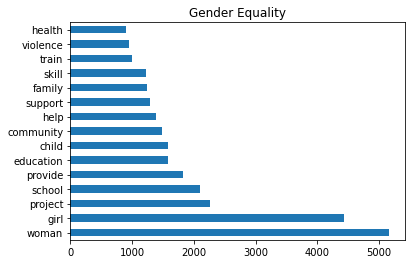

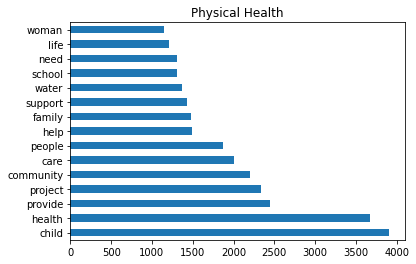

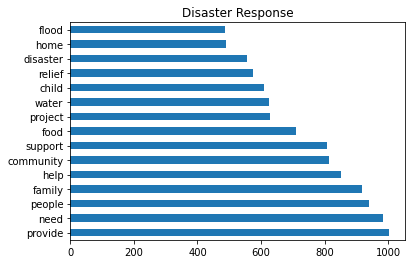

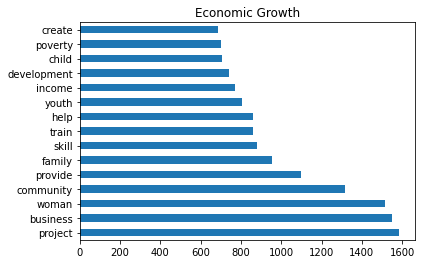

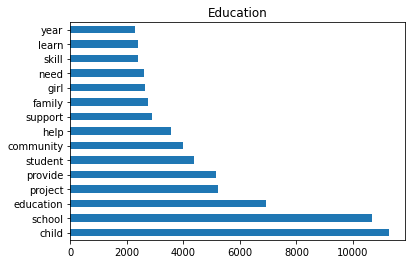

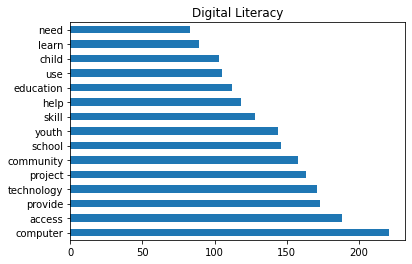

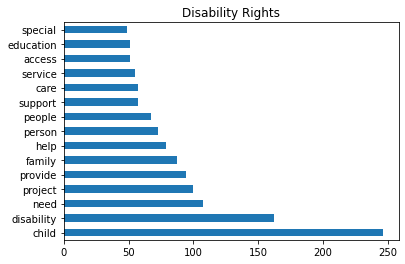

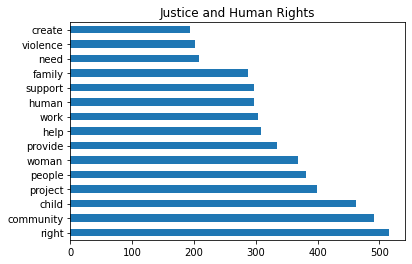

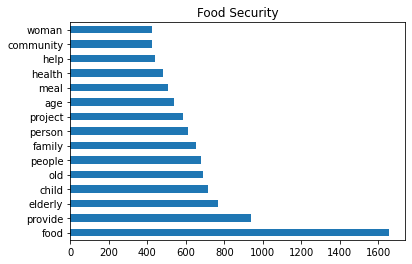

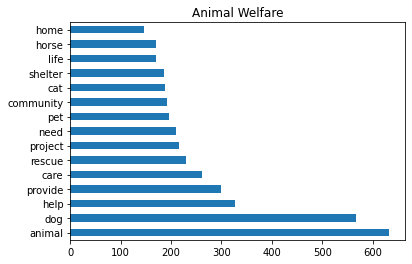

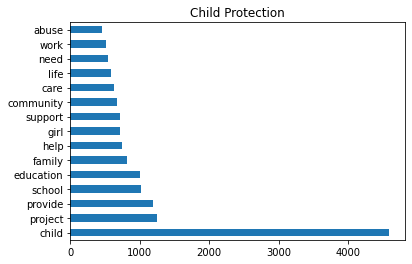

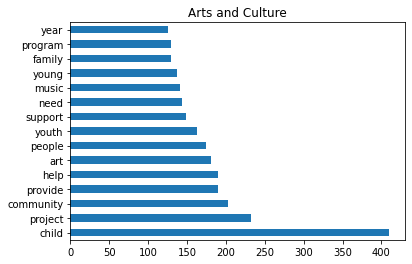

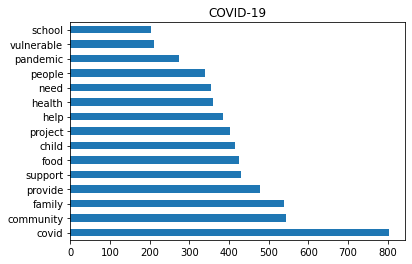

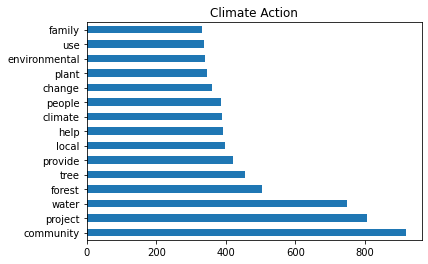

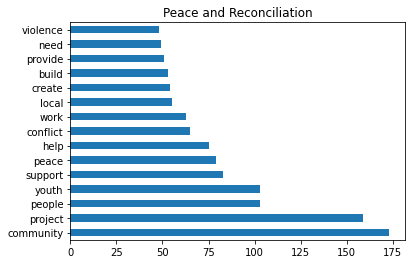

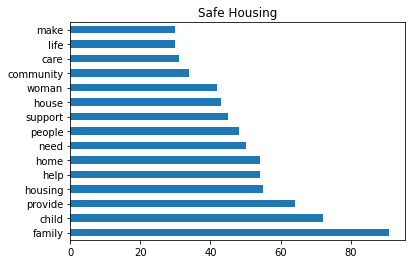

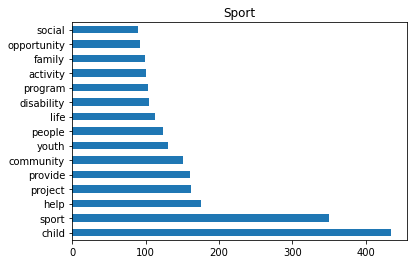

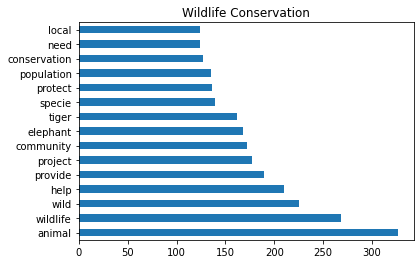

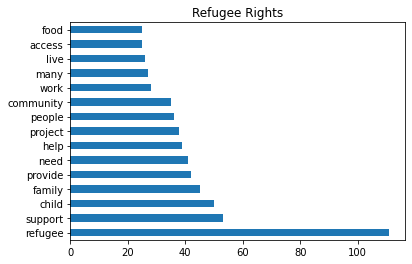

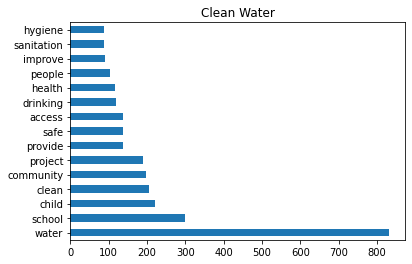

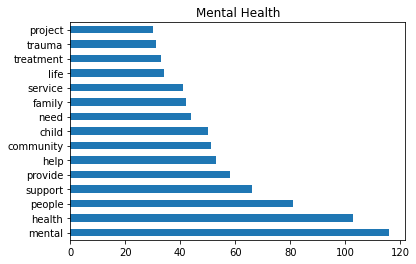

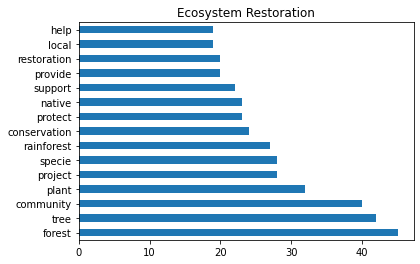

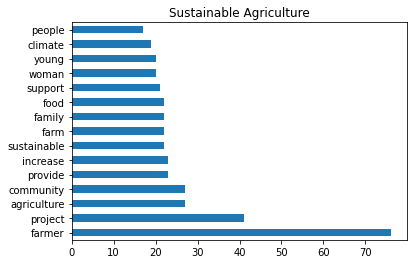

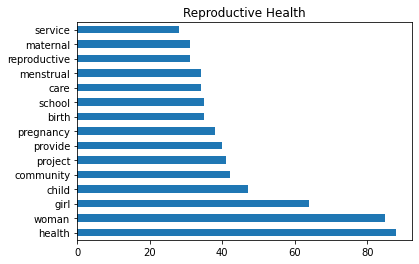

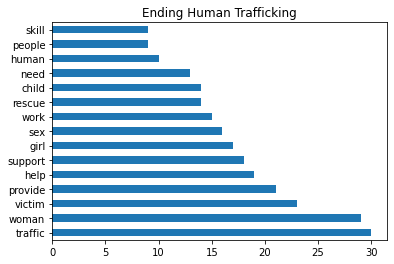

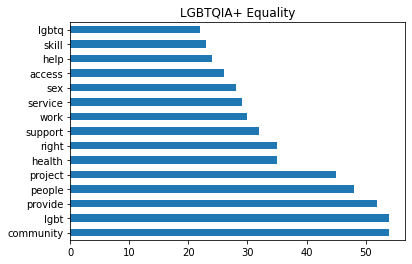

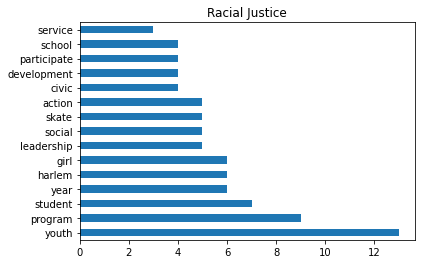

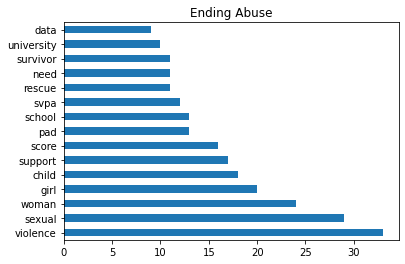

In [20]:
grouped_bw = bw.groupby('theme').sum()
themes = list(y.unique())
for theme in themes:
    theme_df = grouped_bw.loc[theme].sort_values(ascending = False)
    most_common_words = grouped_bw.loc[theme].sort_values(ascending = False).index[:15]
    fig, ax = plt.subplots()
    theme_df[most_common_words].plot.barh()
    ax.set_title(theme)
    plt.show()

In [11]:
tfid.shape

(5000, 38373)

In [15]:
y_tfid = tfid['theme']
X_tfid = tfid.drop('theme', axis = 1)